In [1]:
dataDir = 'C:\Users\bugsbunny\school\Clustering Techniques Seminar\project\test_datasets';

# ROCF clustering tests
Testing my ROCF implementation on numerous synthetic datasets to see how well it works. The original authors did not release their implementation, and I couldn't find the synthetic datasets they used, so these tests also server as a sanity check that my implementation is working at all. 

These are all just *quick visual tests* -- I don't calculate any metrics, nor do I really sweep $k$ to find the best clustering.

## 2-cluster

### original labels

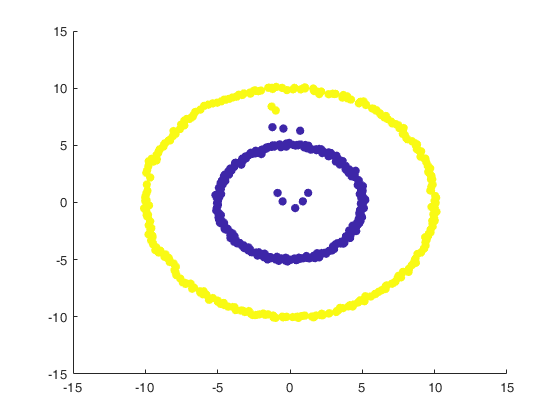

In [6]:
load([dataDir filesep '2-cluster.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF labels

In [10]:
rocf = Rocf(data, 10);
rocf.cluster();

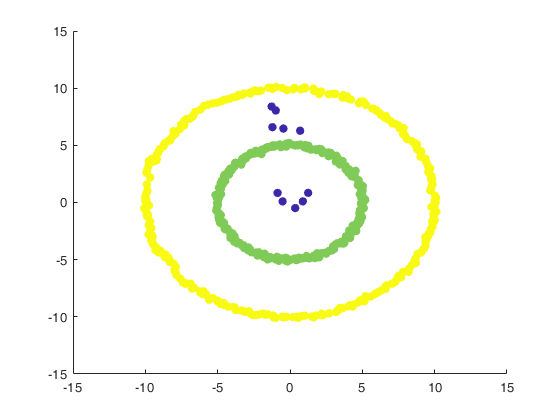

In [11]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

These results seem reasonable! I would certainly classify the points between the rings as noise/outliers

## Aggregation

### original labels

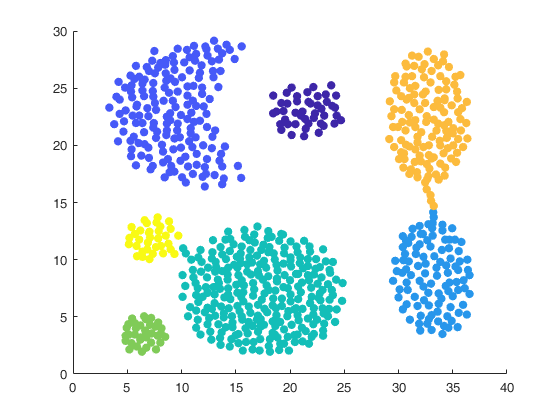

In [12]:
load([dataDir filesep 'aggregation.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [23]:
rocf = Rocf(data, 5);
rocf.cluster();

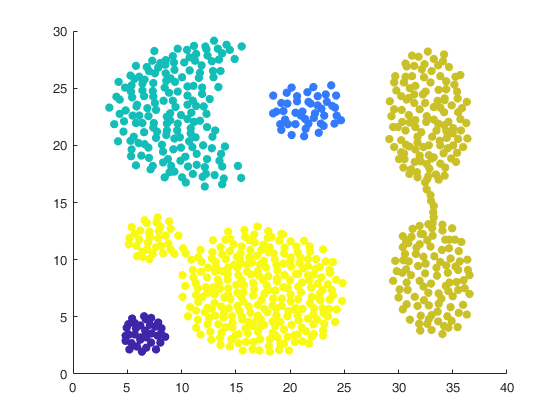

In [24]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

## Banana

### original labels

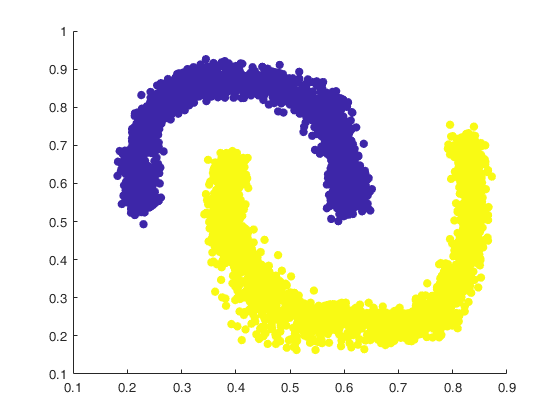

In [26]:
load([dataDir filesep 'banana.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [37]:
rocf = Rocf(data, 30);
rocf.cluster();

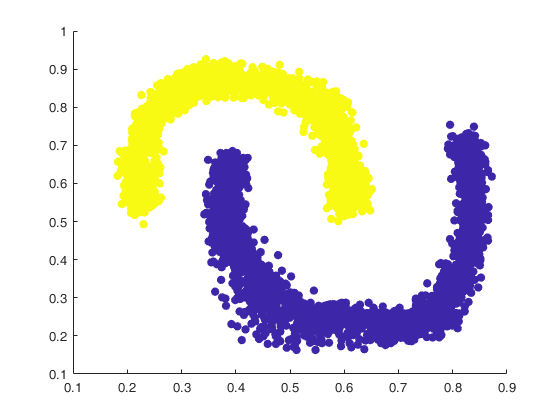

In [38]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

The selection of $k$ is pretty arbitrary here. I just swept it until the clusters were correctly identified. Smaller values of k classified some of the points as noise

## Compound

### original labels

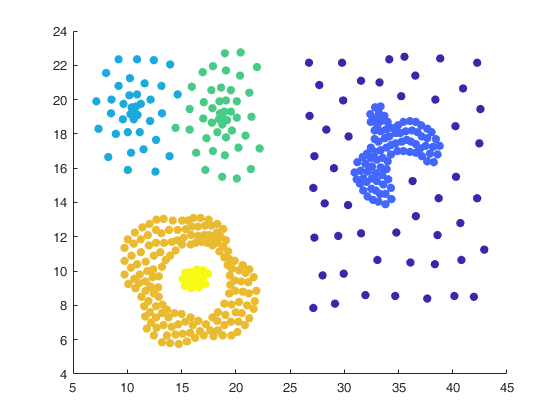

In [43]:
load([dataDir filesep 'compound.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [64]:
rocf = Rocf(data, 8);
rocf.cluster();

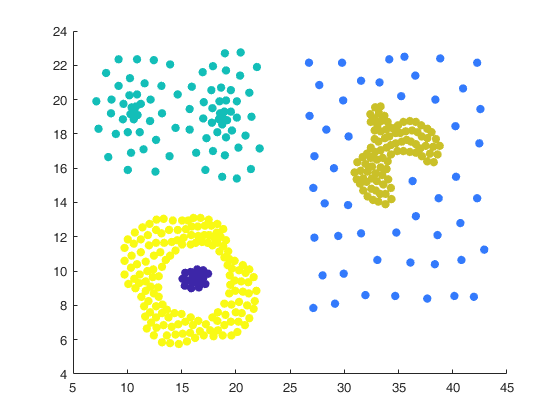

In [65]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [67]:
rocf.IsolatedOutliers


ans =

  1x0 empty double row vector




Interesting. The sparse region of points around the dense shape in the upper right were not classified as outliers, and were correctly classified as a cluster. I'm not surprised that ROCF did not separate the two Gaussian clusters; those are closely spaced together

## cure t2 4k

### original labels

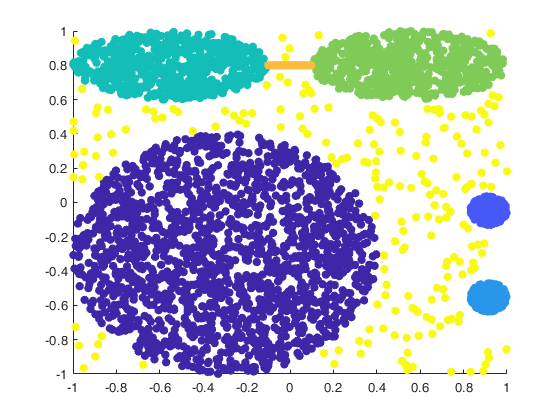

In [68]:
load([dataDir filesep 'cure-t2-4k.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [99]:
rocf = Rocf(data, 7);
rocf.cluster();

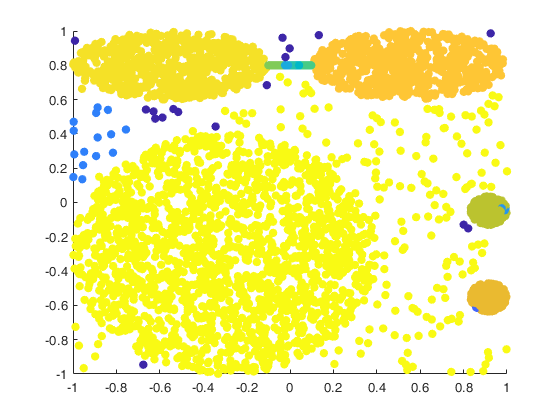

In [100]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [90]:
rocf.IsolatedOutliers


ans =

  Columns 1 through 13

        4014        4045        4093        4114        4132        4183        4070        4137        4077        4121        4044        4055        4078

  Columns 14 through 16

        4126        4173        4194




In [97]:
rocf = Rocf(data, 6);
rocf.cluster();

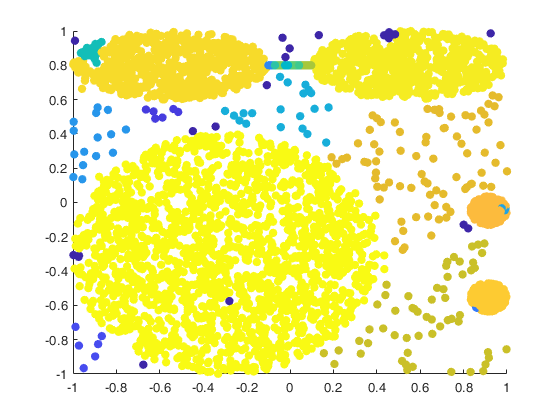

In [98]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

ROCF fails to detect the random noise points as outliers. Since the authors didn't test of this dataset, I am not sure if their implementation would have correctly classified the points as outliers. Based upon other results, I am guessing that the issue is not my implementation

## D31

### original labels

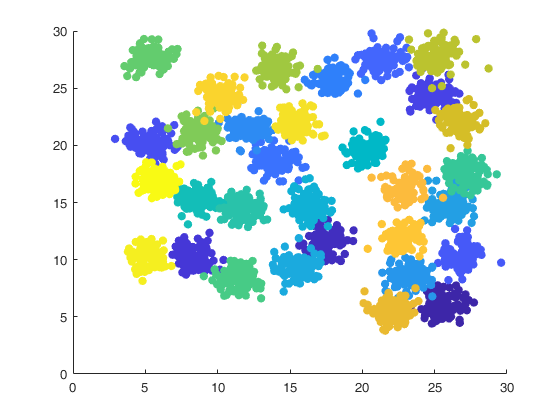

In [101]:
load([dataDir filesep 'D31.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [117]:
rocf = Rocf(data, 4);
rocf.cluster();

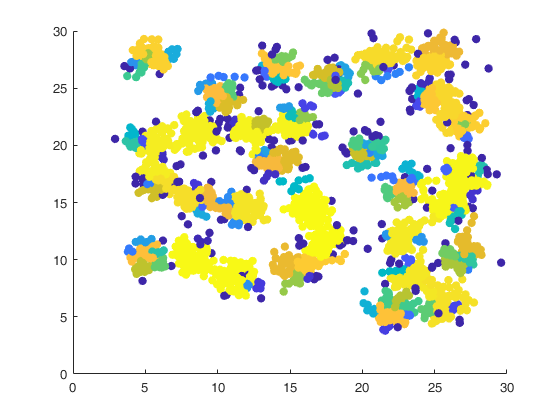

In [118]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

Results are not great on this dataset. However, ROCF is intended for outlier detection, not necessarily cluster plus outlier detection, so this is probably not a great dataset to evaluate on.

## Jain

### original labels

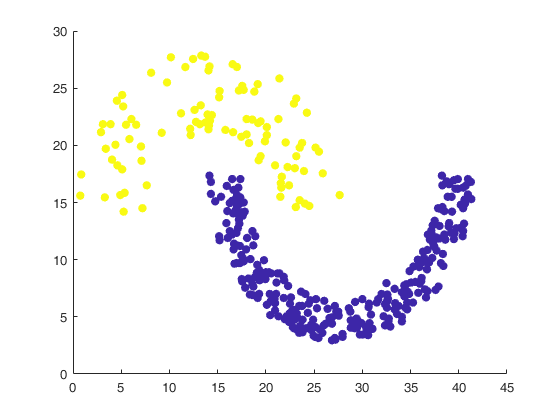

In [119]:
load([dataDir filesep 'jain.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [143]:
rocf = Rocf(data, 8);
rocf.cluster();

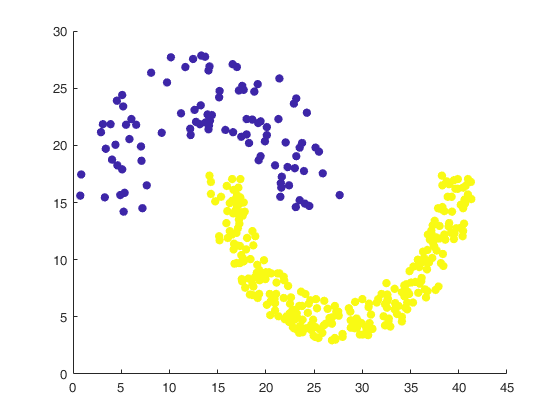

In [144]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

## R15

### original labels

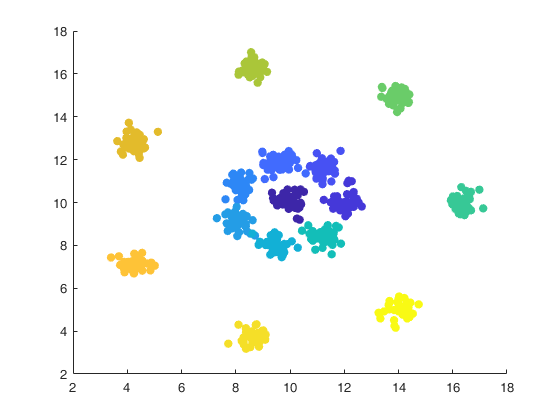

In [145]:
load([dataDir filesep 'R15.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [154]:
rocf = Rocf(data, 6);
rocf.cluster();

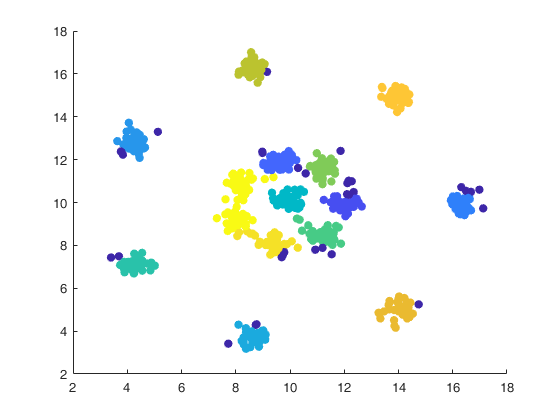

In [155]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

## Spiral Square

### original labels

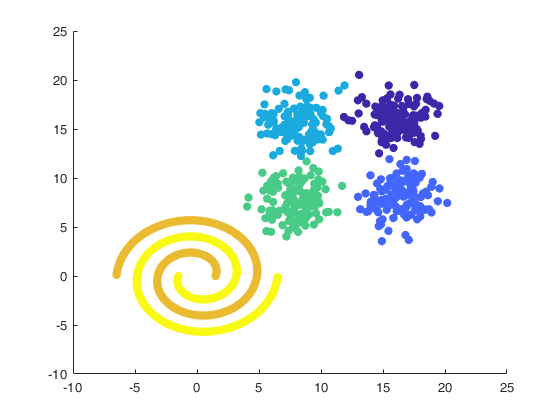

In [156]:
load([dataDir filesep 'spiralsquare.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [163]:
rocf = Rocf(data, 5);
rocf.cluster();

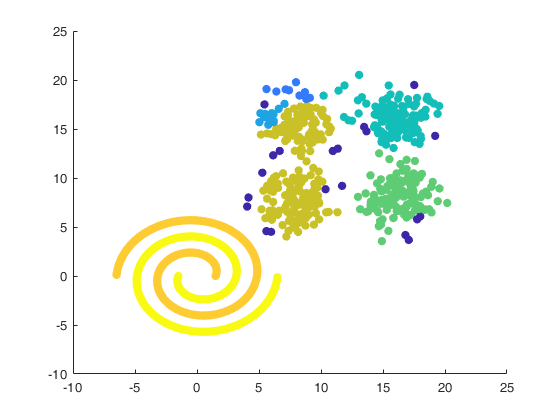

In [164]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

## Two Moon

### original labels

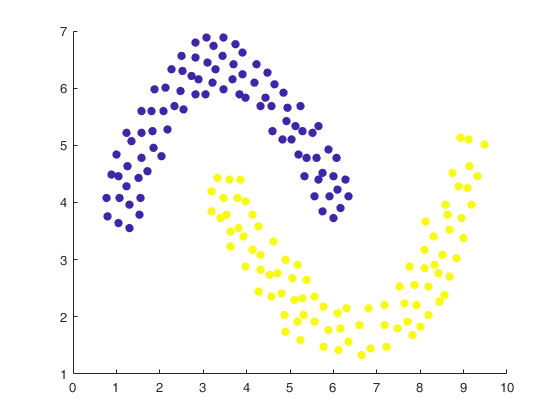

In [165]:
load([dataDir filesep 'twomoon.mat'])
scatter(data(:,1), data(:,2), 40, label, 'filled')

### ROCF results

In [166]:
rocf = Rocf(data, 8);
rocf.cluster();

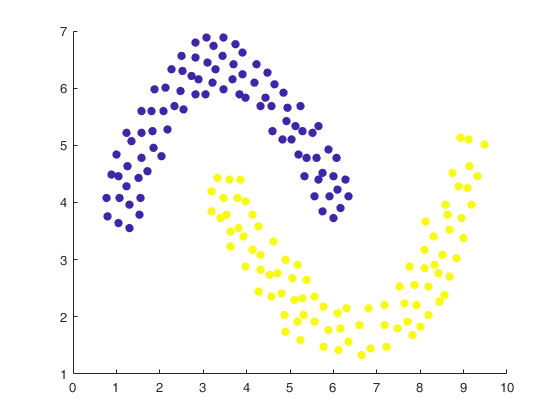

In [167]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

## Unbalance
This dataset has 3 clusters of size 2000 and 5 clusters of size 100. This should be a good test of the ROCF algorithm, as the algorithm is designed to detect small "outlier" clusters, which the size 100 clusters could be considered to fit that definition. This is from https://cs.joensuu.fi/sipu/datasets/, as several other datasets tested here have been.

### original labels

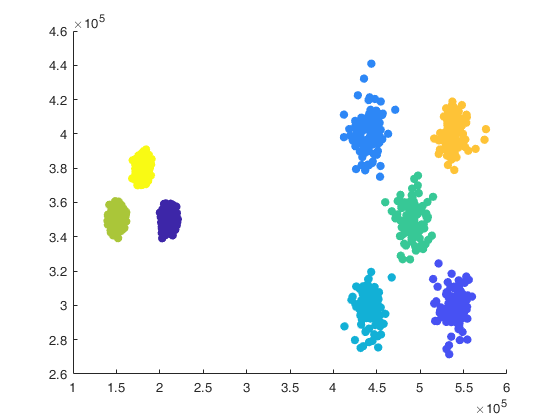

In [430]:
data = dlmread([dataDir filesep 'unbalance.txt']);
labels = importdata([dataDir filesep 'unbalance-gt.pa']);
scatter(data(:,1), data(:,2), 40, labels, 'filled')

### ROCF results

In [206]:
rocf = Rocf(data, 9);
rocf.cluster();

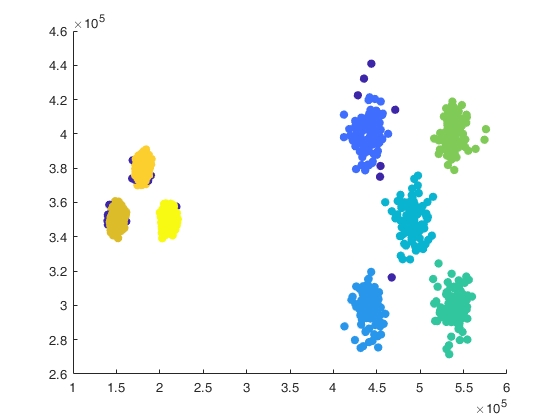

In [207]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [208]:
rocf.OutlierClusters


ans =

  5x1 cell array

    {1x94  double}
    {1x99  double}
    {1x100 double}
    {1x100 double}
    {1x100 double}




For $k = 9$, the five clusters on the right are "correctly" identified as outlier clusters compared to the clusters of size 2000 on the left. 

In [209]:
rocf = Rocf(data,10);
rocf.cluster();

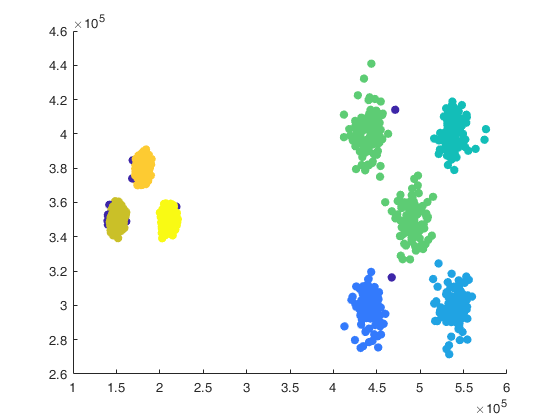

In [210]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [212]:
rocf.OutlierClusters
rocf.Clusters


ans =

  0x1 empty cell array


ans =

  7x1 cell array

    {1x99   double}
    {1x100  double}
    {1x100  double}
    {1x199  double}
    {1x1993 double}
    {1x1997 double}
    {1x1999 double}




increasing $k$ to 10 results in two of the small "outlier" clusters being clustered together

## 2D unbalanced blobs with noise
This dataset was created with scikit-learn's `make_blobs` function. The clusters have sizes of 20, 100, 500, and 1500. 

### original labels

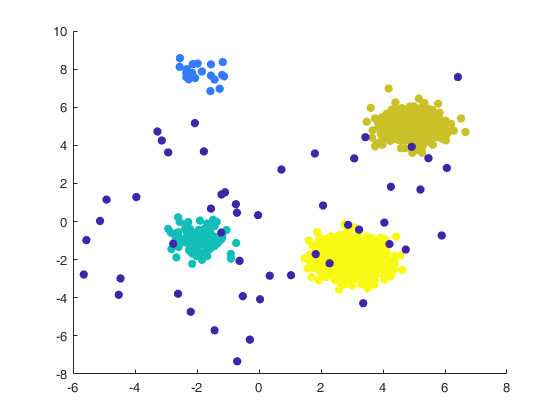

In [368]:
load([dataDir filesep 'unbalanced_blobs_2d_noise.mat'])
scatter(data(:,1), data(:,2), 40, labels, 'filled')

### ROCF results

In [369]:
rocf = Rocf(data, 14);
rocf.cluster();

increasing $k$ to 15 results in the teal outlier cluster being clustered into the large yellow cluster

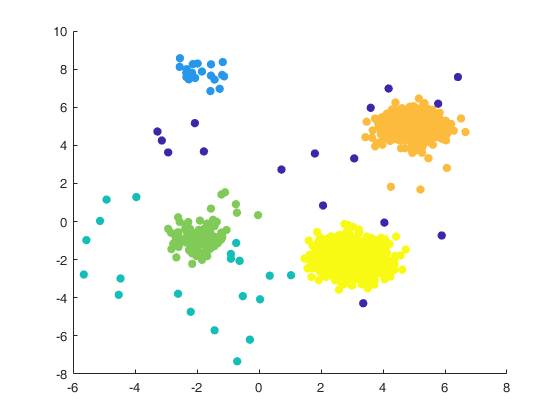

In [370]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [371]:
rocf.IsolatedOutliers
rocf.OutlierClusters


ans =

  Columns 1 through 13

         282         506        1501        2121        2148        2152        2164        2166        2124        2136        2137        2151        2156

  Columns 14 through 16

        2158        2163        2168


ans =

  2x1 cell array

    {1x20 double}
    {1x20 double}




In [372]:
rocf.Clusters


ans =

  5x1 cell array

    {1x20   double}
    {1x20   double}
    {1x105  double}
    {1x503  double}
    {1x1506 double}




The algorithm incorrectly identifies some of the random noise as a cluster. Though, for what it's worth, the small outlier cluster of size 20, as well as most of the random noise, do get identified as either an outlier cluster or isolated outliers. So it did for the most part identify the outliers. The actual outlier rate is close to the computed outlier rate

In [373]:
actualOutlierRate = 1 - (100 + 500 + 1500)/(20 + 100 + 500 + 1500 + 50)
rocf.OutlierRate



actualOutlierRate =

     3.225806451612900e-02


ans =

     2.580645161290318e-02




## 20D unbalanced blobs with noise
This was created with scikit-learn's `make_classification` method. The proportions of the cluster sizes are 0.02, 0.18, 0.3, and 0.5, split  across 1000 samples. 50 random noise points were added. 

The original paper only tested on 2D and 4D datasets, which is not very convincing since many datasets have much higher dimension than 4. This test will give some insight into the ability to deal with noise features. The dataset here has 2 informative features and 18 uninformative features

### original labels

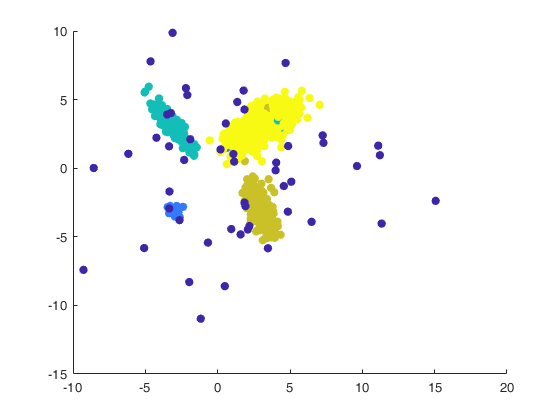

In [374]:
load([dataDir filesep 'unbalanced_blobs_20d_noise.mat'])
scatter(data(:,1), data(:,2), 40, labels, 'filled')

### ROCF results

In [375]:
rocf = Rocf(data, 10);
rocf.cluster();

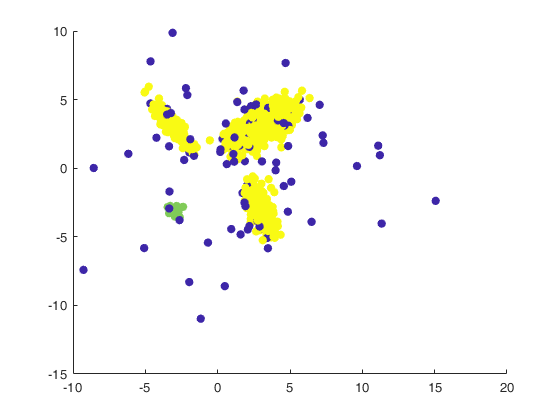

In [376]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

The clustering result here is not very close to the actual clustering, as the three large clusters have all been grouped together. However, the random noise and the small cluster have been identified. 

The estimated outlier rate is about twice as large as the actual outlier rate. I imagine some points got improperly classified as noise due to the noise features

In [377]:
actualOutlierRate = 1 - ((0.18 + 0.3 + 0.5)*1000)/(1000 + 50)
rocf.OutlierRate


actualOutlierRate =

     6.666666666666665e-02


ans =

     1.295238095238095e-01




In [378]:
rocf = Rocf(data, 20);
rocf.cluster()

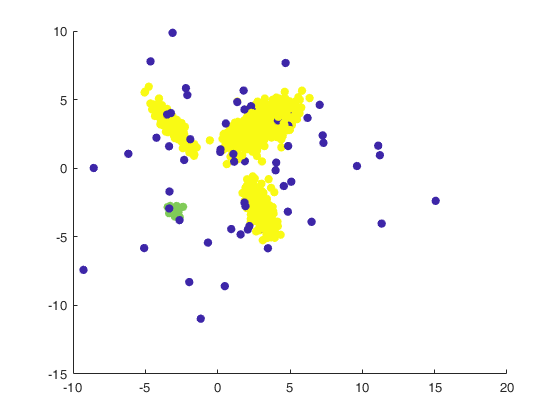

In [379]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [380]:
rocf.OutlierRate


ans =

     8.476190476190482e-02




The outlier rate moves towards the actual outlier rate as $k$ is increased. Increasing $k > 20$ results in  the outlier cluster being identified as isolate outliers instead of an outlier cluster.

In [381]:
rocf = Rocf(data, 5);
rocf.cluster()

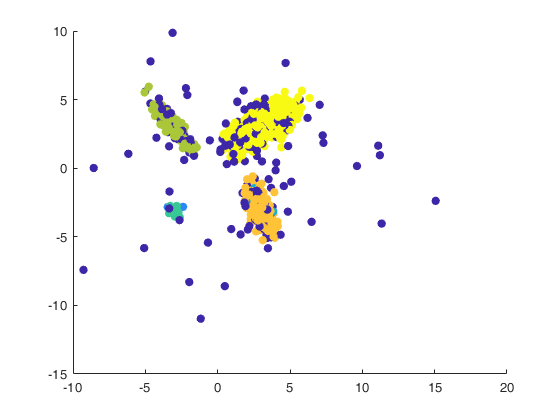

In [382]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

decreasing $k$ results in being able to separate the three large clusters, but the outlier rate goes up significantly compared to the actual outlier rate. The point of ROCF is to identify outliers, not properly identify normal clusters, so this is not a big deal and larger $k$ should be used on this dataset

In [383]:
rocf.OutlierClusters
rocf.OutlierRate


ans =

  3x1 cell array

    {1x6  double}
    {1x7  double}
    {1x14 double}


ans =

     3.219047619047619e-01




## Moons with noise
Two moons with noise generated by scikit-learn's `make_moons` method. The moons have 500 samples total, with a noise standard deviation of 0.1. 20 random noise points were added.

### original labels

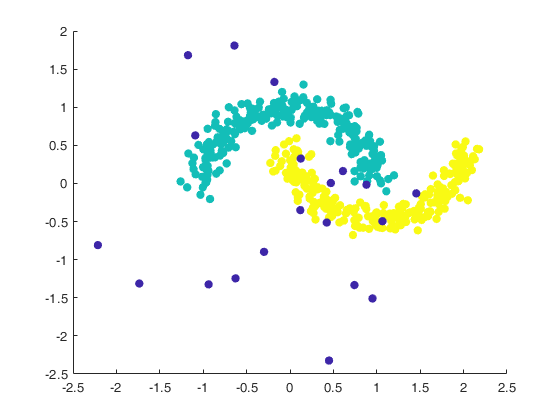

In [384]:
load([dataDir filesep 'moons_with_noise.mat'])
scatter(data(:,1), data(:,2), 40, labels, 'filled')

### ROCF results

In [385]:
rocf = Rocf(data, 6);
rocf.cluster();

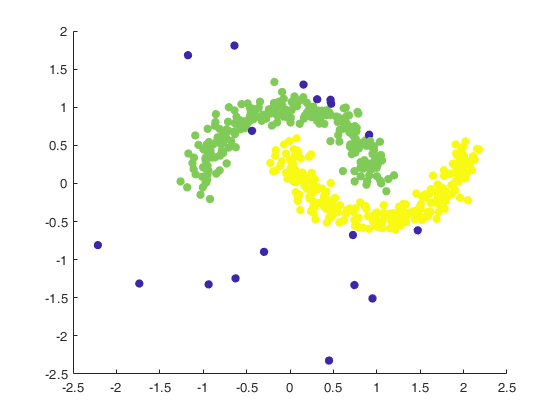

In [386]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [387]:
actualOutlierRate = 20/520
rocf.OutlierRate


actualOutlierRate =

     3.846153846153846e-02


ans =

     3.846153846153844e-02




It isn't able to separate the two moons very well (smaller values of k result in multiple clusters in each moon), but the isolated noise is able to be identified fairly well.

## Grid
3 grids of different densities and 40 points of random noise. The grids are separated by the inter-point separation of the sparsest grid

### original labels

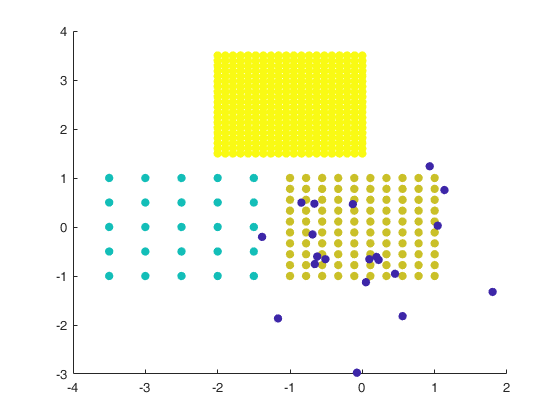

In [424]:
load([dataDir filesep 'multiple_grids_noise.mat'])
scatter(data(:,1), data(:,2), 40, labels, 'filled')

### ROCF results

In [425]:
rocf = Rocf(data, 4);
rocf.cluster();

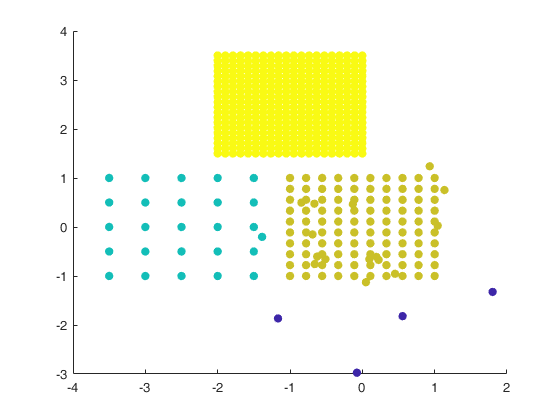

In [426]:
scatter(rocf.Data(:,1), rocf.Data(:,2), 40, rocf.Labels, 'filled')

In [427]:
rocf.OutlierClusters
rocf.Clusters
length(rocf.IsolatedOutliers)


ans =

  1x1 cell array

    {1x26 double}


ans =

  3x1 cell array

    {1x26  double}
    {1x115 double}
    {1x400 double}


ans =

     4




It does a good job of separating the grids and identifying the noise points that are not overlapping with a grid.

---

## closing thoughts
Overall, it looks like my implementation is performing reasonably, so I am inclined to believe that I implemented the algorithm correctly. Due to not being able to test on the datasets used in the paper, I can't be certain, though.

The algorithm does a farily good job of indentifying isolated noise and outlier clusters on simple 2D datasets. It often does not correctly identify the normal clusters, but that is not necessarily problematic when we are only interested in the outliers.

Overall, I am not fully convinced of the algorithm's efficancy. 